<a href="https://colab.research.google.com/github/hydekage/Sistem-Automasi/blob/master/Modul_Motor_DC_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DC Motor ##

Mengendalikan kecepatan putaran motor DC agar mengikuti setpoint (misal: 100 rad/s) dengan kontroler PID. Kita akan:

Menyusun model motor DC sebagai sistem orde 2.

Menggunakan PID (dengan tuning awal).

Melihat respons terhadap sinyal langkah (step).

$$G(s)=\frac{K}{(Ls+R)(Js+b)+K^2}$$

$$R=1 \Omega$$
$$L=0.5 H$$
$$J=0.01 kgm^2$$
$$b=0.1 Nms$$
$$K=0.01$$

In [3]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.9 MB/s eta 0:00:00


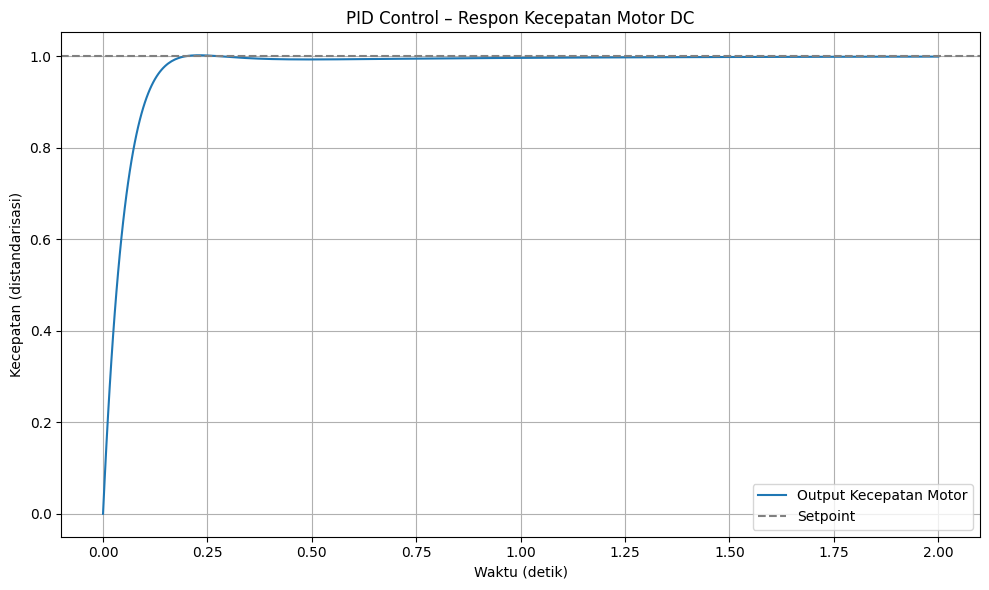

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Transfer function motor DC
num = [0.01]
den = [0.005, 0.06, 0.1001]
G = ctrl.tf(num, den)

# Parameter PID
Kp = 140
Ki = 200
Kd = 10

# PID controller: (Kd*s^2 + Kp*s + Ki) / s
C = ctrl.tf([Kd, Kp, Ki], [1, 0])

# Closed-loop system
T = ctrl.feedback(C * G, 1)

# Simulasi respon terhadap input step (misalnya 100 rad/s → normalisasi 1)
t = np.linspace(0, 2, 500)
t_out, y_out = ctrl.step_response(T, T=t)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_out, y_out, label="Output Kecepatan Motor")
plt.axhline(1, color='gray', linestyle='--', label="Setpoint")
plt.title("PID Control – Respon Kecepatan Motor DC")
plt.xlabel("Waktu (detik)")
plt.ylabel("Kecepatan (distandarisasi)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
